In [1]:
import operator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
import scikitplot as skplt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import FeatureUnion
from sklearn.metrics import classification_report
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error

In [2]:
# tenemos 3 set datos con los cuales trabajaremos
soloteam = pd.read_csv('2020_result1team.csv')
bluevsred = pd.read_csv('2020_bluevsred.csv')
redvsblue = pd.read_csv('2020_redvsblue.csv')

In [3]:
soloteam.result

0        1
1        0
2        0
3        1
4        1
        ..
10945    0
10946    1
10947    0
10948    1
10949    0
Name: result, Length: 10950, dtype: int64

In [4]:
#-----------------------------------------------------------------------------------------

In [5]:
#Feature engineering

In [6]:
#columnas númericas
numericsolo = soloteam._get_numeric_data()
numericsolo

,year,playoffs,game,patch,playerid,player,champion,gamelength,result,kills,...,csdiffat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15
0,2020,0,1,9.24,100,NaN,NaN,2220,1,17,...,8.0,21953.0,27219.0,507.0,22778.0,28884.0,519.0,-825.0,-1665.0,-12.0
1,2020,0,1,9.24,200,NaN,NaN,2220,0,11,...,-8.0,22778.0,28884.0,519.0,21953.0,27219.0,507.0,825.0,1665.0,12.0
2,2020,0,2,9.24,100,NaN,NaN,2227,0,5,...,-34.0,21714.0,26869.0,501.0,27198.0,31702.0,557.0,-5484.0,-4833.0,-56.0
3,2020,0,2,9.24,200,NaN,NaN,2227,1,21,...,34.0,27198.0,31702.0,557.0,21714.0,26869.0,501.0,5484.0,4833.0,56.0
4,2020,0,3,9.24,100,NaN,NaN,1711,1,21,...,25.0,24882.0,30349.0,584.0,22316.0,28252.0,531.0,2566.0,2097.0,53.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10945,2020,1,2,10.16,200,NaN,NaN,1597,0,5,...,9.0,23629.0,28518.0,486.0,25229.0,29809.0,487.0,-1600.0,-1291.0,-1.0
10946,2020,1,3,10.16,100,NaN,NaN,1766,1,18,...,45.0,25474.0,30043.0,539.0,22681.0,28496.0,498.0,2793.0,1547.0,41.0
10947,2020,1,3,10.16,200,NaN,NaN,1766,0,3,...,-45.0,22681.0,28496.0,498.0,25474.0,30043.0,539.0,-2793.0,-1547.0,-41.0
10948,2020,1,4,10.16,100,NaN,NaN,2154,1,14,...,1.0,23565.0,28977.0,503.0,25895.0,28704.0,489.0,-2330.0,273.0,14.0


In [7]:
numericsolo.isnull().sum()

year              0
playoffs          0
game              0
patch             0
playerid          0
               ... 
opp_xpat15      142
opp_csat15      142
golddiffat15    142
xpdiffat15      142
csdiffat15      142
Length: 89, dtype: int64

In [8]:
# rellenando nan values
numericsolo.fillna(numericsolo.mean(), inplace=True)
numericsolo.isnull().sum()

year            0
playoffs        0
game            0
patch           0
playerid        0
               ..
opp_xpat15      0
opp_csat15      0
golddiffat15    0
xpdiffat15      0
csdiffat15      0
Length: 89, dtype: int64

In [9]:
# tirando columnas totalmente vacias
numericsolo.dropna(axis=1, how='all', inplace=True)

In [10]:
# change int64 to int 32
numericsolo32 = numericsolo.astype(np.float32)

In [11]:
a=list(numericsolo32.dtypes)

In [12]:
variable_y = numericsolo['result']
variables_x = numericsolo.loc[:, numericsolo.columns != 'result']

In [13]:
# Separa en 80% train y 20% test
X_train, X_test, y_train, y_test = train_test_split(variables_x, variable_y, test_size=0.2)#, random_state=0) (quitar parentesis)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(8760, 81) (8760,) (2190, 81) (2190,)


In [14]:
clasif = RandomForestClassifier(n_jobs=2, random_state=0)
clasif.fit(X_train, y_train)

RandomForestClassifier(n_jobs=2, random_state=0)

In [15]:
preds = clasif.predict(X_test)

In [16]:
pd.crosstab(y_test, preds, rownames=['Resultado Real'], colnames= ['Resultados predichos'])

Resultados predichos,0,1
Resultado Real,,
0,1095,9
1,16,1070


In [17]:
roc_auc_score(y_test, preds)

0.9885574305388742

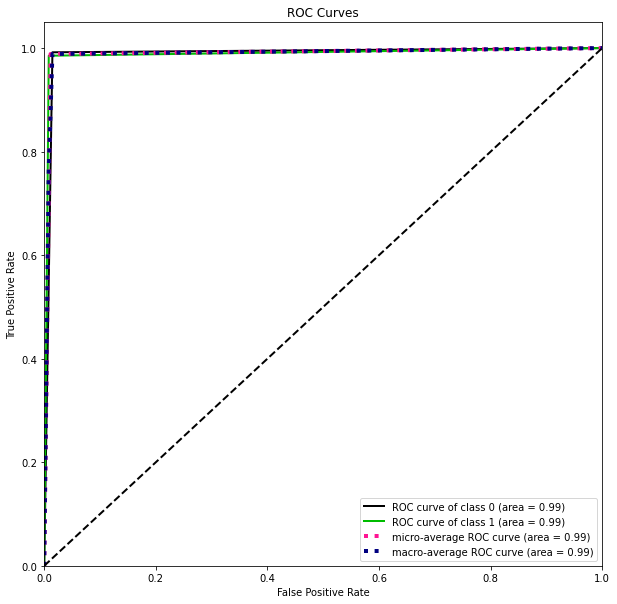

In [18]:
y_prob = np.concatenate(((1-preds).reshape(-1,1),preds.reshape(-1,1)), axis =1)
skplt.metrics.plot_roc(y_test, y_prob,figsize=(10,10))
plt.show()

In [19]:
# volvienod a separar en 4 el data set
X_train, X_test, y_train, y_test = train_test_split(variables_x, variable_y, test_size=0.2) 
# Separa en 80% train y 20% test

In [20]:
logreg = LogisticRegression() # aqui ponemos todos los argumentos necesarios, si los tenemos
# aqui hacemos la instancia de nuestro modelo
logreg.fit(X_train,y_train) # despues lo entrenamos

C:\Users\Efrain\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
y_pred = logreg.predict(X_test)
print(f'La precision de nuestro modelo de clasificacion de regresion logistica es: {logreg.score(X_test, y_test)}')

La precision de nuestro modelo de clasificacion de regresion logistica es: 0.9689497716894977


In [22]:
# aplicando un escalado
#x = data.values --------> esta no sirve por que tiene todo el dataset
x = variables_x.values #----------> este solo incluye las 20 observaciones, son las como las preguntas del examen
x = scale(x)

In [23]:
# usamos PCA para una reduccion de columnas
len(numericsolo.columns)

82

In [24]:
# para saber cual es la cantidad de features que hay que pasar
covar_matrix = PCA(n_components=81)

In [25]:
covar_matrix.fit(x) # metemos las observaciones
varianza = covar_matrix.explained_variance_ratio_

var = np.cumsum(np.round(varianza, decimals=3)*100)
# no debe empezar con el 100%

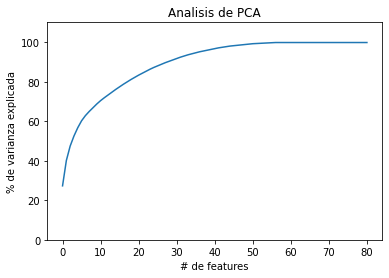

In [26]:
plt.ylabel('% de varianza explicada')
plt.xlabel('# de features')
plt.title('Analisis de PCA')
plt.ylim(0, 110)
plt.plot(var)

In [27]:
# para saber cual es la mejor feature
# simulando que la grafica se corta a los 20 componentes
pca = PCA(n_components=20)
seleccion = SelectKBest(k=1)

featureCombinada = FeatureUnion([('pca',pca),('seleccion universal', seleccion)])

X_features = featureCombinada.fit(variables_x, variable_y).transform(x)
print(f'El espacio combinado tiene {X_features.shape[1]} features')

El espacio combinado tiene 21 features


C:\Users\Efrain\AppData\Roaming\Python\Python38\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\Efrain\AppData\Roaming\Python\Python38\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [28]:
X_train, X_test, y_train, y_test = train_test_split(variables_x, variable_y, test_size=0.2) 
print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8760, 81) (2190, 81) (8760,) (2190,)


In [29]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print(f'La precision de nuestro modelo de clasificacion de regresion logistica es: {logreg.score(X_test, y_test)}')
pd.crosstab(y_test, preds, rownames=['Resultado Real'], colnames= ['Resultados predichos'])

La precision de nuestro modelo de clasificacion de regresion logistica es: 0.9735159817351599


C:\Users\Efrain\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Resultados predichos,0,1
Resultado Real,,
0,556,541
1,555,538


In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1097
           1       0.97      0.98      0.97      1093

    accuracy                           0.97      2190
   macro avg       0.97      0.97      0.97      2190
weighted avg       0.97      0.97      0.97      2190



In [31]:
# recall = Verdaderos positivo / (Verdaderos Positivos + Falsos Negaticos) : 
# capacidad para encontrar verdaderos positivos
# precision = Verdaderos positivos / (Verdaderos Positibos + Falsos Posistivos): 
# capacidad de identifcar correctamente una etiqueta como positiva

In [32]:
# como parte de esta extraccion de features, hacer una matriz de correlacion para saber que afecta mas

<AxesSubplot:>

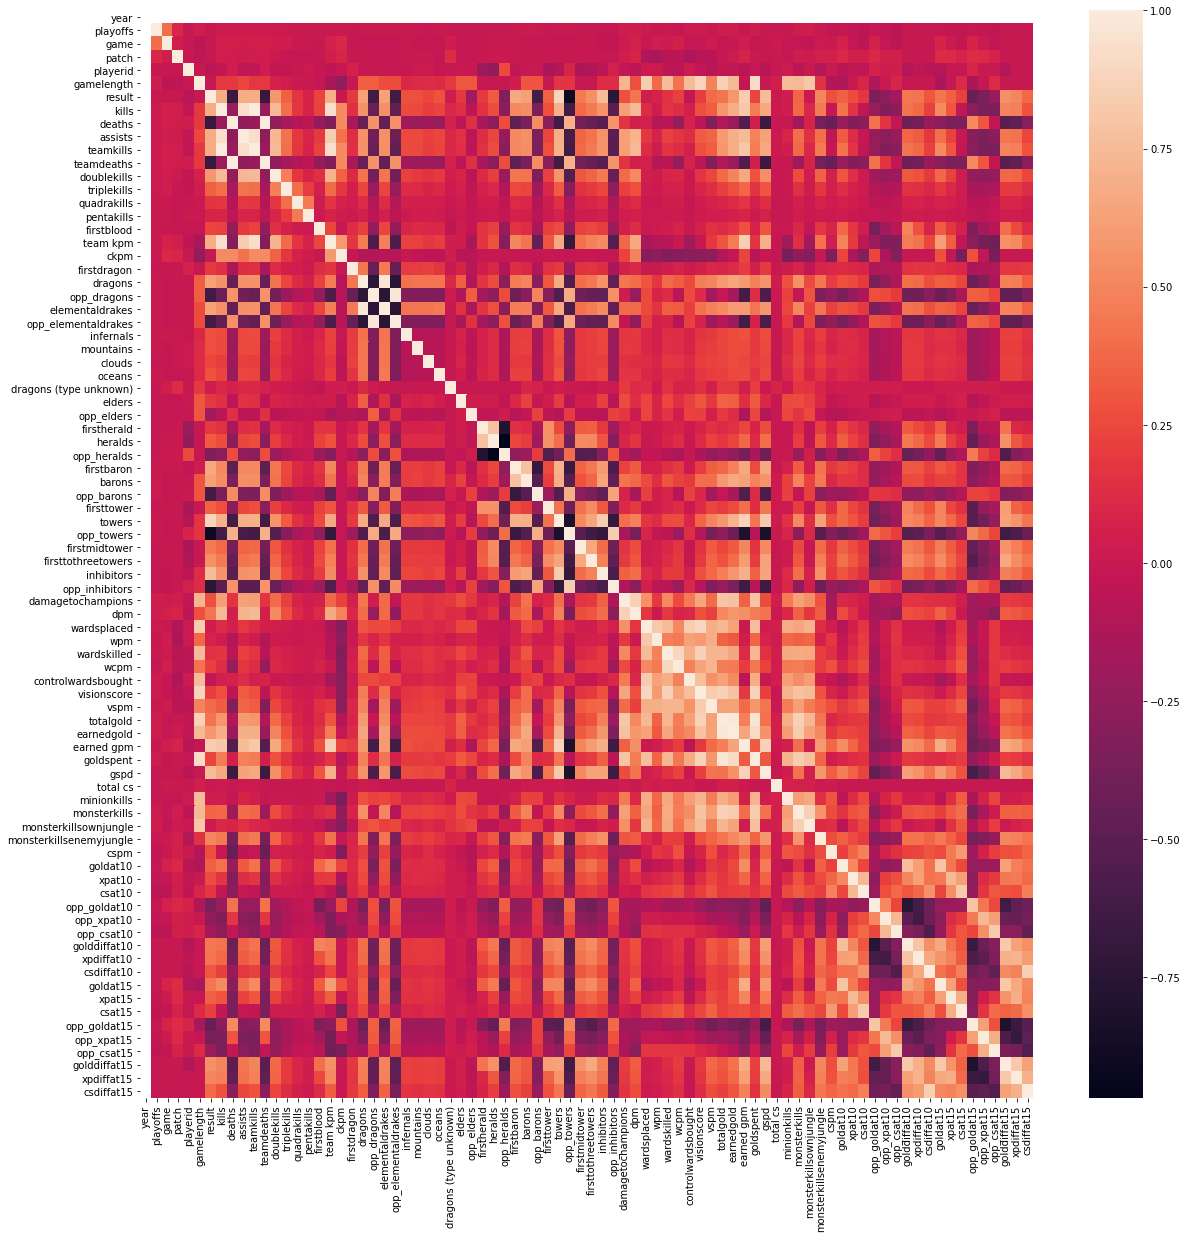

In [33]:
# ocupando todos los datos
plt.figure(figsize=(20,20))
corr = numericsolo.corr(method='pearson')
sns.heatmap(corr, xticklabels = corr.columns.values, yticklabels = corr.columns.values)

<AxesSubplot:>

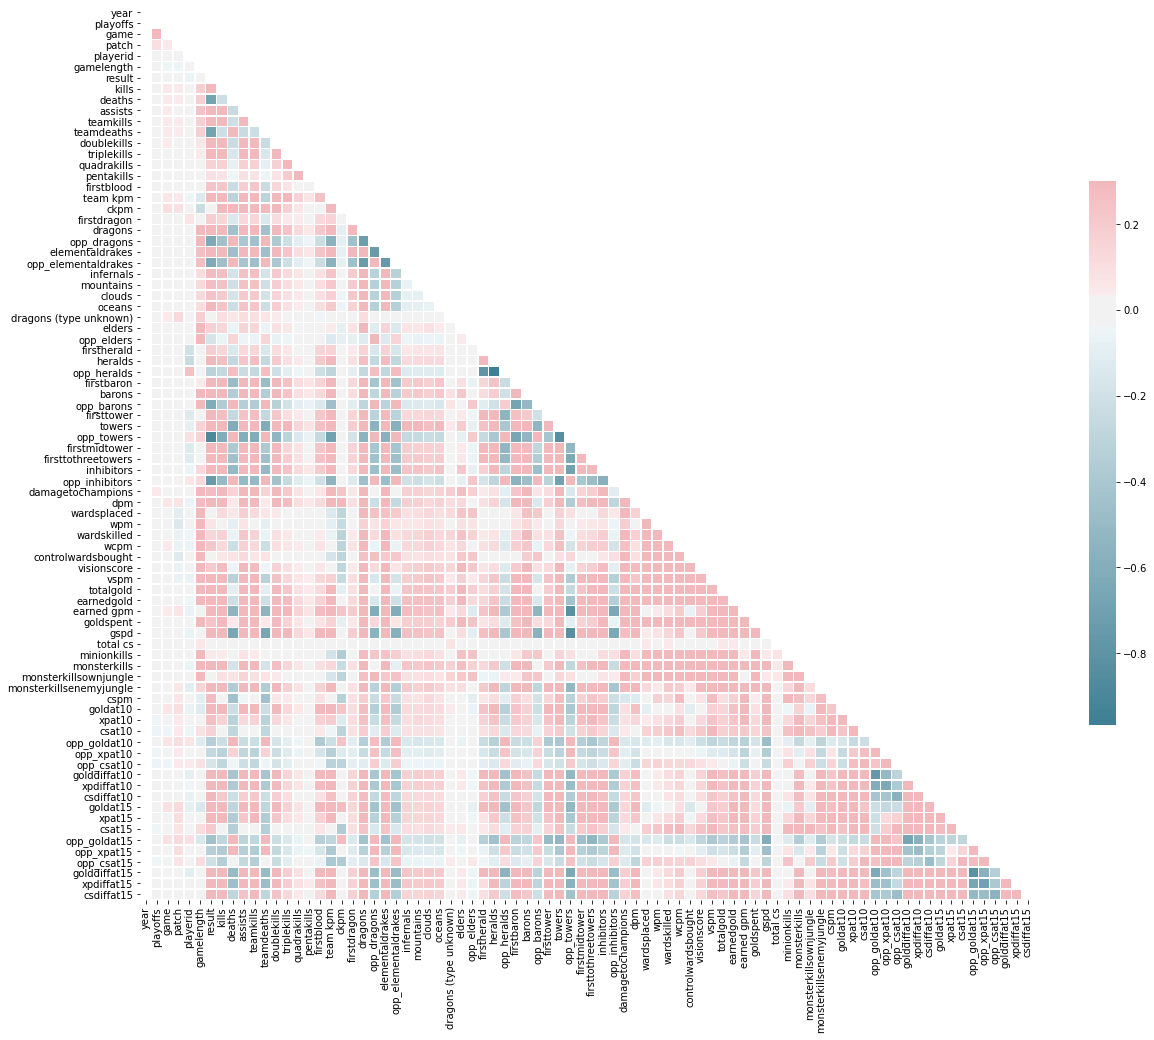

In [34]:
corr=numericsolo.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=np.bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(20,20))
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},xticklabels=corr.columns.values,yticklabels=corr.columns.values)


In [35]:
# quitamos columnas que podrían no brindan información util
variables_x, variable_y = numericsolo.drop(['result', 'year', 'playoffs','result'], axis = 1), numericsolo['result']

In [36]:
# despues de esto volvemos hacer todo el proceso

X_train, X_test, y_train, y_test = train_test_split(variables_x, variable_y, test_size=0.2) 
print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print(f'La precision de nuestro modelo de clasificacion de regresion logistica es: {logreg.score(X_test, y_test)}')
pd.crosstab(y_test, preds, rownames=['Resultado Real'], colnames= ['Resultados predichos'])

# observamos que ocn este método baja la precisión

(8760, 79) (2190, 79) (8760,) (2190,)
La precision de nuestro modelo de clasificacion de regresion logistica es: 0.9762557077625571


C:\Users\Efrain\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Resultados predichos,0,1
Resultado Real,,
0,529,536
1,582,543


In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1065
           1       0.98      0.97      0.98      1125

    accuracy                           0.98      2190
   macro avg       0.98      0.98      0.98      2190
weighted avg       0.98      0.98      0.98      2190



In [38]:
# usando chi2
# debido a que no acepta valores negativos el metodo chi2, los quitaremos
numericsolo.columns[(numericsolo < 0).any()]

Index(['gspd', 'golddiffat10', 'xpdiffat10', 'csdiffat10', 'golddiffat15',
       'xpdiffat15', 'csdiffat15'],
      dtype='object')

In [39]:
variables_x, variable_y = numericsolo.drop(['result', 'year', 'playoffs','result','gspd', 'golddiffat10', 'xpdiffat10', 'csdiffat10', 'golddiffat15',
       'xpdiffat15', 'csdiffat15'], axis = 1), numericsolo['result']

In [40]:
selector_chi2 = SelectKBest(chi2, k=20)
X_kbest = selector_chi2.fit_transform(variables_x, variable_y)
print(f'Numero de features originalmente {variables_x.shape[1]}')
print(f'Numero de features reducidas {X_kbest.shape[1]}')

Numero de features originalmente 72
Numero de features reducidas 20


In [41]:
# método wrapper para feature selection, interaccion que existen entre las diferntes variables
# Recursive Feature Elimination, igual otro metodo
clf = RandomForestClassifier(n_jobs=2, random_state=0)
rfe = RFE(clf, 20)
rfe = rfe.fit(variables_x, variable_y)
print(rfe.support_)
print(rfe.ranking_)

C:\Users\Efrain\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


[False False False False  True  True  True  True  True False False False
 False False  True  True False  True  True False False False False False
 False False False False False False False False  True  True False  True
  True False False  True  True False False False False False False False
 False False  True  True  True  True False False False False  True False
 False False False False False False False False False False False False]
[46 34 49  7  1  1  1  1  1 10 35 44 52 51  1  1 47  1  1 12  8 37 41 42
 38 36 39 22 50 45 43  6  1  1 48  1  1 40 31  1  1  5  9 27 23 20 11 29
  4 13  1  1  1  1 53 24  3 21  1 14 18 30 28 25 19 26  2 15 33 16 17 32]


In [42]:
# vamos a ver cada una de las importancia de las columnas
modelo = RandomForestClassifier(n_jobs=2, random_state=0)
modelo.fit(variables_x, variable_y)
print(modelo.feature_importances_)

[2.11226265e-04 6.30651674e-04 1.17267814e-04 1.66640551e-03
 4.24915181e-02 2.75690199e-02 4.70999782e-02 2.99670138e-02
 5.32662103e-02 2.87602591e-03 1.10202516e-03 2.35767848e-04
 7.71585957e-05 1.16499022e-04 2.02876218e-02 2.49097820e-03
 1.62364713e-04 1.04879775e-02 4.28302846e-03 1.16232421e-02
 1.06900412e-02 3.92260888e-04 3.66439428e-04 3.35032315e-04
 3.76924380e-04 5.38341817e-04 7.16912540e-04 1.49168093e-03
 1.85170010e-04 2.89379780e-04 2.68603785e-04 2.33578338e-02
 2.94537388e-02 3.80262968e-02 2.03497866e-04 1.34263934e-01
 1.35738015e-01 2.61653885e-03 7.83126655e-03 7.94666917e-02
 1.30376319e-01 2.34126735e-03 1.71933030e-03 1.06325070e-03
 9.30950616e-04 1.04369252e-03 1.15684031e-03 1.01299487e-03
 1.15075408e-03 1.20622989e-03 3.64035361e-03 9.93729420e-03
 8.83202915e-02 1.80552355e-03 6.08560812e-05 1.06754314e-03
 1.34244507e-03 9.77573104e-04 1.18958451e-02 1.37137848e-03
 9.91644803e-04 9.59414764e-04 9.42530524e-04 9.35475155e-04
 8.81691122e-04 1.006484

In [43]:
# ocuparemos Gini-importance para saber cuales son esos features 
features = {}
for feature, importancia in zip(variables_x.columns, modelo.feature_importances_):
    features[feature] = importancia
    
importancias = pd.DataFrame.from_dict(features, orient='index').rename(columns={0:'Gini-importance'})
importancias.sort_values(by='Gini-importance', ascending = False).head(20)

,Gini-importance
opp_towers,0.135738
towers,0.134264
opp_inhibitors,0.130376
earned gpm,0.088320
inhibitors,0.079467
teamdeaths,0.053266
assists,0.047100
kills,0.042492
opp_barons,0.038026
teamkills,0.029967


In [44]:
# -------------------------------------------------------------------------------

In [45]:
# usando XGBOOST-------------

In [46]:
x_cols = list(variables_x.columns)

In [80]:
variables_x, variable_y = numericsolo.drop(['result', 'year', 'playoffs','result','gspd', 'golddiffat10', 'xpdiffat10', 'csdiffat10', 'golddiffat15',
       'xpdiffat15', 'csdiffat15'], axis = 1), numericsolo['result']

In [81]:
data_dmatrix = xgb.DMatrix(data=variables_x,label=variable_y)
X_train, X_test, y_train, y_test = train_test_split(variables_x, variable_y, test_size=0.2, random_state=123)

In [82]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [83]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

[10:21:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[10:21:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


In [51]:
#--------------------------------------------------------------------------------------------------

In [56]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.218448


In [57]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[10:18:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[10:18:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[10:18:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


In [58]:
# contains train and test RMSE metrics for each boosting round.
cv_results

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.455004,0.000301,0.455302,0.000091
1,0.417189,0.003520,0.418058,0.003895
2,0.379884,0.003405,0.380814,0.003899
3,0.348495,0.002161,0.349491,0.002571
4,0.321851,0.001728,0.323348,0.001885
5,0.296053,0.001606,0.297709,0.002568
6,0.271499,0.002128,0.273357,0.002730
7,0.249481,0.002224,0.251625,0.003059
8,0.230530,0.000985,0.232938,0.001758
9,0.213807,0.000778,0.216496,0.002003


In [59]:
print((cv_results["test-rmse-mean"]).tail(1))

49    0.106316
Name: test-rmse-mean, dtype: float64


In [60]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[10:18:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[10:18:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
'''
# pending to execute ************ (print tree)
xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()
'''

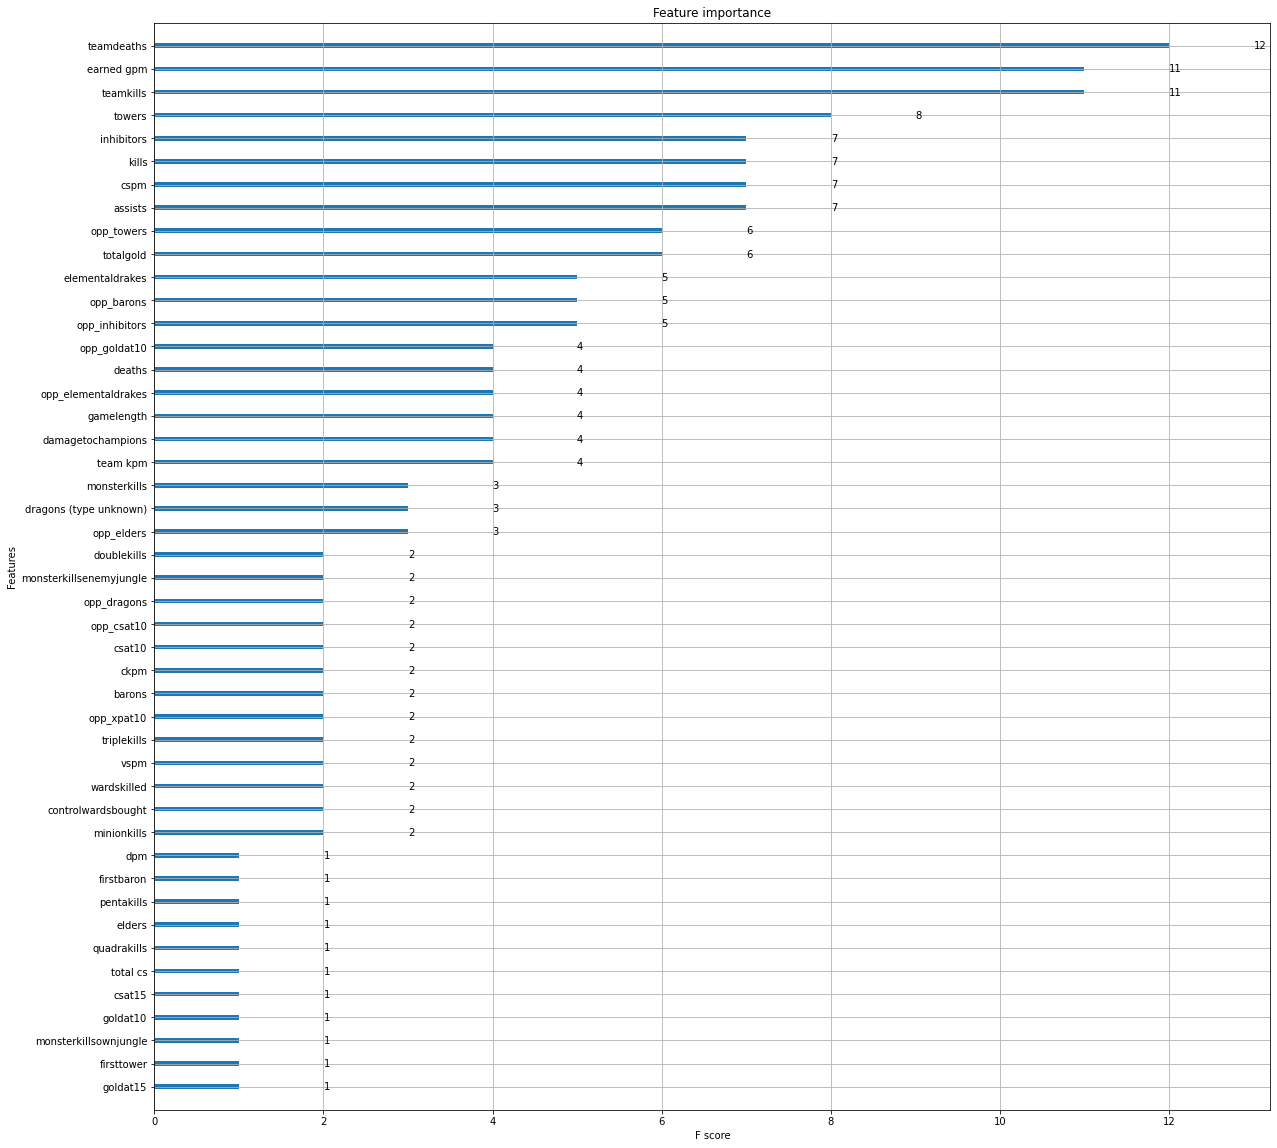

In [90]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [20,20]
plt.show()

In [63]:
X_test.columns

Index(['game', 'patch', 'playerid', 'gamelength', 'kills', 'deaths', 'assists',
       'teamkills', 'teamdeaths', 'doublekills', 'triplekills', 'quadrakills',
       'pentakills', 'firstblood', 'team kpm', 'ckpm', 'firstdragon',
       'dragons', 'opp_dragons', 'elementaldrakes', 'opp_elementaldrakes',
       'infernals', 'mountains', 'clouds', 'oceans', 'dragons (type unknown)',
       'elders', 'opp_elders', 'firstherald', 'heralds', 'opp_heralds',
       'firstbaron', 'barons', 'opp_barons', 'firsttower', 'towers',
       'opp_towers', 'firstmidtower', 'firsttothreetowers', 'inhibitors',
       'opp_inhibitors', 'damagetochampions', 'dpm', 'wardsplaced', 'wpm',
       'wardskilled', 'wcpm', 'controlwardsbought', 'visionscore', 'vspm',
       'totalgold', 'earnedgold', 'earned gpm', 'goldspent', 'total cs',
       'minionkills', 'monsterkills', 'monsterkillsownjungle',
       'monsterkillsenemyjungle', 'cspm', 'goldat10', 'xpat10', 'csat10',
       'opp_goldat10', 'opp_xpat10', 'opp_

In [64]:
# graficación de resultados---------------------------------------------------

In [65]:
#ticks_x = np.array(X_test.apply(lambda row: str(row['team'])+"_"+str(row['side']),axis=1))
#out_df['innings_over'] = np.array(val_df.apply(lambda row: str(row['inning']) + "_" + str(row['over']), axis=1))
y_test_print = list(y_test[:20])
preds_print = list(preds[:20])

In [66]:
type(y_test_print)

list

<ipython-input-67-d60941b44291>:40: UserWarning: Legend does not support 'red' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend(("red", "blue"), ('Lose', 'Win'))
<ipython-input-67-d60941b44291>:40: UserWarning: Legend does not support 'blue' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend(("red", "blue"), ('Lose', 'Win'))


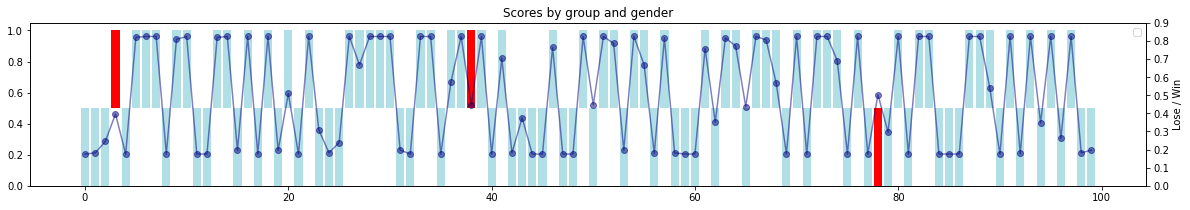

In [67]:
from_game = 0
to_game = 100

y_test_print = list(y_test[from_game:to_game])
preds_print = list(preds[from_game:to_game])


fig, ax1 = plt.subplots(figsize=(20,3))
ax2 = ax1.twinx()

#y_test = [1,1,0,0,1]
#preds = [.6,.8,.2,.6,.9]


width = 0.8       # the width of the bars: can also be len(x) sequence


for index in range(0,len(y_test_print)): 
    if (y_test_print[index] != round(preds_print[index])):
        color1 = ["white", "red"]
    else:
        color1 = ["white", "powderblue"]
        
    if(y_test_print[index] == 1): 
        color = color1
    else:
        color = color1[::-1]
    ax1.bar(index, .5, width, color = color[0])
    ax1.bar(index, .5, width, color = color[1], bottom=.5)


ax2.plot(np.arange(0, len(y_test_print), 1), preds_print, c="navy", alpha=0.5,marker='o')

plt.ylabel('Lose / Win')
plt.xlabel('Game')
plt.title('Scores by group and gender')
#nombres de juego
#plt.xticks(len(y_test))
plt.yticks(np.arange(0, 1, .1))
plt.legend(("red", "blue"), ('Lose', 'Win'))

plt.show()

In [68]:
# imaginando encuentro entre dos equipos, basandonos en el desempeño de estos durante el año en curso----------

In [69]:
# primero vemos que equipos existen en el set
set(soloteam.team)

{'100 Thieves',
 '100 Thieves Academy',
 '1907 Fenerbahçe Academy',
 '1907 Fenerbahçe Esports',
 '5 Ronin',
 '5 Ronin Academy',
 '7more7 Pompa Team',
 'AGO ROGUE',
 'ASUS ROG ELITE',
 'AXIZ',
 'Afreeca Freecs',
 'All Combo',
 'All Knights',
 'Alpha Esports',
 'Asura',
 'Avant Gaming',
 'Awesome Spear',
 'Azules Esports',
 'BT Excel',
 'Berjaya Dragons',
 'Beşiktaş Academy',
 'Beşiktaş Esports',
 'Bilibili Gaming',
 'Bilibili Gaming Junior',
 'Burning Core',
 'CERBERUS Esports',
 'CLG Academy',
 'CR4ZY',
 'Chiefs Academy',
 'Chiefs Esports Club',
 'Cloud9',
 'Cloud9 Academy',
 'Counter Logic Gaming',
 'Crest Gaming Act',
 'CrowCrowd',
 'Cyber Gaming',
 'DAMWON Gaming',
 'DRX',
 'Dark Passage',
 'Dark Passage Academy',
 'Defusekids',
 'DetonatioN FocusMe',
 'Dignitas',
 'Dignitas Academy',
 'Dire Cubs',
 'Dire Wolves',
 'Dominus Esports',
 'Dominus Esports Young',
 'Dragon Army',
 'EDG Youth Team',
 'EDward Gaming',
 'EGN Esports',
 'ESC Shane',
 'EVOS Esports',
 'Electronik Generation',

In [102]:
len(set(soloteam.team))

245

In [91]:
# se elijen que equipos y lado a jugar
# para el ejemplo "FunPlus Phoenix" lado rojo y 'G2 Esports' lado azul
redteam = soloteam[(soloteam.team=="FunPlus Phoenix") & (soloteam.side=="Red")]
blueteam = soloteam[(soloteam.team=="G2 Esports") & (soloteam.side=="Blue")]

In [ ]:
# se elijen que equipos y lado a jugar
# para el ejemplo "FunPlus Phoenix" lado rojo y 'G2 Esports' lado azul

In [92]:
#workflow para tratar ambos sets
redteamnum = redteam._get_numeric_data()
blueteamnum = blueteam._get_numeric_data()
# rellenando nan values
redteamnum.fillna(redteamnum.mean(), inplace=True)
blueteamnum.fillna(blueteamnum.mean(), inplace=True)
# tirando columnas totalmente vacias
redteamnum.dropna(axis=1, how='all', inplace=True)
blueteamnum.dropna(axis=1, how='all', inplace=True)
# change int64 to int 32
redteamnum32 = redteamnum.astype(np.float32)
blueteamnum32 = blueteamnum.astype(np.float32)

In [93]:
redteamnum32 = redteamnum32.mean(axis=0).to_frame().T
redteamnum32

,year,playoffs,game,patch,playerid,gamelength,result,kills,deaths,assists,...,csdiffat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15
0,2020.0,0.135593,1.915254,10.092544,200.0,1917.661011,0.559322,13.644068,12.254237,33.169491,...,-5.81356,25084.082031,28921.396484,495.9823,24856.794922,28577.785156,501.253479,227.288132,343.610168,-5.271186


In [94]:
blueteamnum32 = blueteamnum32.mean(axis=0).to_frame().T
blueteamnum32

,year,playoffs,game,patch,playerid,gamelength,result,kills,deaths,assists,...,csdiffat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15
0,2020.0,0.257143,1.4,10.085999,100.0,1894.514282,0.685714,18.0,13.885715,39.257141,...,7.257143,25315.96875,28657.439453,487.598785,24037.253906,28166.353516,476.884491,1278.714233,491.085724,10.714286


In [95]:
concat_teams = pd.concat([blueteamnum32, redteamnum32],ignore_index=True)
concat_teams

,year,playoffs,game,patch,playerid,gamelength,result,kills,deaths,assists,...,csdiffat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15
0,2020.0,0.257143,1.400000,10.085999,100.0,1894.514282,0.685714,18.000000,13.885715,39.257141,...,7.257143,25315.968750,28657.439453,487.598785,24037.253906,28166.353516,476.884491,1278.714233,491.085724,10.714286
1,2020.0,0.135593,1.915254,10.092544,200.0,1917.661011,0.559322,13.644068,12.254237,33.169491,...,-5.813560,25084.082031,28921.396484,495.982300,24856.794922,28577.785156,501.253479,227.288132,343.610168,-5.271186


In [96]:
# quitamos la columnas que se quitaron en el entrenamiento del modelo
redteamnum32.drop(['result', 'year', 'playoffs','gspd', 'golddiffat10', 'xpdiffat10', 'csdiffat10', 'golddiffat15',
       'xpdiffat15', 'csdiffat15'], axis=1, inplace=True)
blueteamnum32.drop(['result', 'year', 'playoffs','gspd', 'golddiffat10', 'xpdiffat10', 'csdiffat10', 'golddiffat15',
       'xpdiffat15', 'csdiffat15'], axis=1, inplace=True)
concat_teams.drop(['result', 'year', 'playoffs','gspd', 'golddiffat10', 'xpdiffat10', 'csdiffat10', 'golddiffat15',
       'xpdiffat15', 'csdiffat15'], axis=1, inplace=True)

In [97]:
type(concat_teams)

pandas.core.frame.DataFrame

In [98]:
# modelo, lo ejecutamos de nuevo para tener el modelo
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)

#aplicando modelo para tener 'preds'
# xg_reg --> es el modelo
preds_red = xg_reg.predict(redteamnum32)
preds_blue = xg_reg.predict(blueteamnum32)
preds_teams = xg_reg.predict(concat_teams)

[11:34:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[11:34:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


In [99]:
preds_red

array([0.41703486], dtype=float32)

In [100]:
preds_blue

array([0.6692923], dtype=float32)

In [101]:
preds_teams

array([0.6692923 , 0.41703486], dtype=float32)

In [103]:
print('Probabilidades de ganar del equipo rojo:',preds_teams[0])
print('Probabilidades de ganar del equipo azul:',preds_teams[1])

Probabilidades de ganar del equipo rojo: 0.6692923
Probabilidades de ganar del equipo azul: 0.41703486
